In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import imblearn
from collections import Counter
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [23]:
data = pd.read_excel('/content/drive/MyDrive/thesis/subset.xlsx')
data.isnull().sum()

song              0
artist            0
peak.rank         0
weeks.on.board    0
ranks_10          0
rhyme_score       0
coupled           0
alternating       0
same              0
length            0
number_you        0
norm_you          0
hit               0
dtype: int64

In [ ]:
#https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
#https://www.kaggle.com/code/arunimsamudra/k-nn-with-hyperparameter-tuning
#https://machinelearningmastery.com/multi-class-imbalanced-classification/
#https://stackoverflow.com/questions/50245684/using-smote-with-gridsearchcv-in-scikit-learn/50245954
#https://stackoverflow.com/questions/68811073/check-the-list-of-available-parameters-with-estimator-get-params-keys
#https://www.datacamp.com/tutorial/naive-bayes-scikit-learn
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
#https://www.kaggle.com/code/arjunprasadsarkhel/simple-random-forest-with-hyperparameter-tuning
#https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

**SMOTE**

Class=1, n=4267 (72.383%)
Class=0, n=1628 (27.617%)


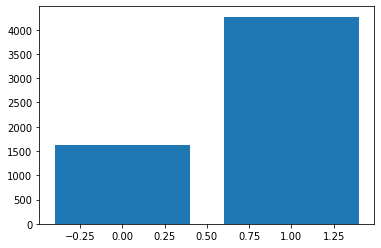

Class=0, n=3414 (57.913%)
Class=1, n=3414 (57.913%)


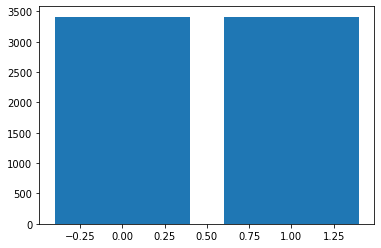

In [24]:
#SMOTE
X = data['rhyme_score']
y = data['hit']
X = X.array
X = X.reshape(-1, 1)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
x_labels = [0, 1]
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

#SMOTE oversample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# transform the dataset
oversample = SMOTE(random_state=42)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

**SMOTE knn**

In [25]:
knn_model = KNeighborsClassifier()

hyperparameters = {'n_neighbors': list(range(1,30)),
                   'p': [1, 2],
                   'weights': ['uniform','distance'],
                   'metric': ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(estimator = knn_model, param_grid=hyperparameters, cv = 5)
best_model = gs.fit(X_train, y_train)

#Print The value of best Hyperparameters
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', best_model.best_estimator_.get_params()['weights'])
print('Best metric:', best_model.best_estimator_.get_params()['metric'])

Best p: 1
Best n_neighbors: 6
Best weights: distance
Best metric: minkowski


In [26]:
#Create KNN Object.
knn = KNeighborsClassifier(p = 1, n_neighbors = 6, weights = 'distance', metric = 'minkowski')
#Training the model.
knn.fit(X_train, y_train)
#Predict train and test data set.
y_hat = knn.predict(X_train)
y_pred = knn.predict(X_test)
#Checking performance our model with classification report.
print("Training set recall score: ", recall_score(y_train, y_hat)) 
print("Training set precision score: ", precision_score(y_train, y_hat)) 
print("Training set accuracy score: ", accuracy_score(y_train, y_hat))
print("Training set F1 score: ", f1_score(y_train, y_hat, average='macro'))

Training set recall score:  0.7659636789689513
Training set precision score:  0.5140554354236289
Training set accuracy score:  0.5209431751611013
Training set F1 score:  0.4903460778448955


In [27]:
print("Recall score: ", recall_score(y_test, y_pred)) 
print("Precision score: ", precision_score(y_test, y_pred)) 
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Recall score:  0.7620164126611958
Precision score:  0.7286995515695067
Accuracy score:  0.6225614927905004
F1 score:  0.5095238317822537


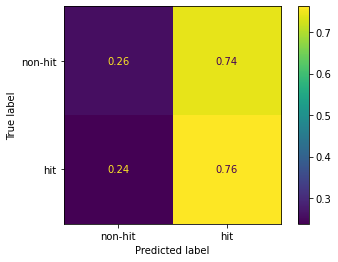

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred, normalize='true')
cmd_obj = ConfusionMatrixDisplay(confusion_matrix, display_labels=['non-hit', 'hit'])
cmd_obj.plot()
pyplot.show()

**SMOTE RF**

In [29]:
rf_model = RandomForestClassifier()

hyperparameters = {'n_estimators': [5,20,50,100], 
                   'max_depth': [int(x) for x in np.linspace(10, 120, num = 12)],
                   'min_samples_leaf': [1, 2, 4],
                   'bootstrap': [True, False]}

gs = GridSearchCV(estimator = rf_model, param_grid=hyperparameters, cv = 5)
best_model = gs.fit(X_train, y_train)

#Print The value of best Hyperparameters
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print('Best bootstrap:', best_model.best_estimator_.get_params()['bootstrap'])

Best n_estimators: 5
Best max_depth: 30
Best min_samples_leaf: 1
Best bootstrap: True


In [30]:
#Create Random Forest Object.
rf = RandomForestClassifier(n_estimators = 5, max_depth = 30, min_samples_leaf = 1, bootstrap = True)
#Training the model.
rf.fit(X_train, y_train)
#Predict train and test data set.
y_hat = rf.predict(X_train)
y_pred = rf.predict(X_test)
#Checking performance our model with classification report.
print("Training set recall score: ", recall_score(y_train, y_hat)) 
print("Training set precision score: ", precision_score(y_train, y_hat)) 
print("Training set accuracy score: ", accuracy_score(y_train, y_hat))
print("Training set F1 score: ", f1_score(y_train, y_hat, average='macro'))

Training set recall score:  0.4985354422964265
Training set precision score:  0.5791085403198367
Training set accuracy score:  0.5681019332161688
Training set F1 score:  0.5660015994065346


In [31]:
print("Recall score: ", recall_score(y_test, y_pred)) 
print("Precision score: ", precision_score(y_test, y_pred)) 
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Recall score:  0.47010550996483
Precision score:  0.7786407766990291
Accuracy score:  0.5199321458863444
F1 score:  0.5072700691121743


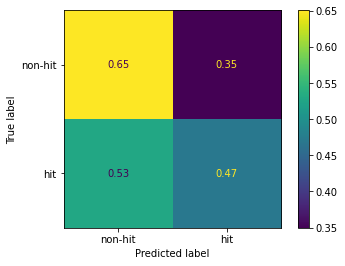

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred, normalize='true')
cmd_obj = ConfusionMatrixDisplay(confusion_matrix, display_labels=['non-hit', 'hit'])
cmd_obj.plot()
pyplot.show()

**SMOTE svm**

In [33]:
#https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
hyperparameters = {'C': [0.1,1, 10, 100, 1000], 
              'gamma': [1,0.1,0.01,0.001]
              }

gs = GridSearchCV(SVC(),hyperparameters, cv = 5)
best_model = gs.fit(X_train, y_train)

print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])

Best C: 1
Best gamma: 1


In [34]:
#Create SVM Object.
svc = SVC(C = 1, gamma = 1, kernel = 'rbf')
#Training the model.
svc.fit(X_train, y_train)
#Predict train and test data set.
y_hat = svc.predict(X_train)
y_pred = svc.predict(X_test)
#Checking performance our model with classification report.
print("Training set recall score: ", recall_score(y_train, y_hat)) 
print("Training set precision score: ", precision_score(y_train, y_hat)) 
print("Training set accuracy score: ", accuracy_score(y_train, y_hat))
print("Training set F1 score: ", f1_score(y_train, y_hat, average='macro'))

Training set recall score:  0.5231400117164616
Training set precision score:  0.5550031075201989
Training set accuracy score:  0.5518453427065027
Training set F1 score:  0.5514757605150428


In [35]:
print("Recall score: ", recall_score(y_test, y_pred)) 
print("Precision score: ", precision_score(y_test, y_pred)) 
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Recall score:  0.492379835873388
Precision score:  0.7924528301886793
Accuracy score:  0.539440203562341
F1 score:  0.5252260971132988


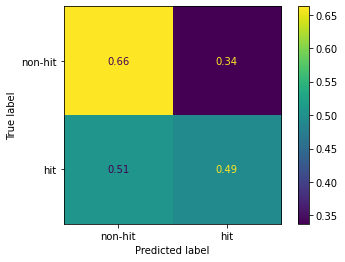

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred, normalize='true')
cmd_obj = ConfusionMatrixDisplay(confusion_matrix, display_labels=['non-hit', 'hit'])
cmd_obj.plot()
pyplot.show()